## Github Classroom

Repository : https://github.com/cs418-fa24/project-check-in-team-7

## Project description

This project focuses on predicting the likelihood of diabetic patients being readmitted to the hospital within 30 days. By leveraging a dataset containing information about patient encounters, including demographic details, medical history, diagnosis codes, and treatment data, the goal is to develop a model that can identify high-risk patients. 
By predicting which patients are most likely to be readmitted, hospitals can allocate resources more effectively, prioritize interventions for high-risk individuals, and improve patient care.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [62]:
df = pd.read_csv("diabetic_data_initial.csv")

In [63]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Exploration

In [64]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (101766, 50)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [66]:
# Display statistical summary for numerical columns
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [67]:
# Display unique values for categorical columns
object_columns = df.select_dtypes(include=['object'])
object_columns.head(10)
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'race': ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Unique values in 'gender': ['Female' 'Male' 'Unknown/Invalid']

Unique values in 'age': ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Unique values in 'weight': ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

Unique values in 'payer_code': ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

Unique values in 'medical_specialty': ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pe

## Data Preprocessing 

In [68]:
df.replace('?', np.nan, inplace=True)

In [69]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


In [70]:
# Drop columns with multiple missing values
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty','discharge_disposition_id','admission_source_id'])

In [71]:
# Drop rows where the race column has missing values
df = df.dropna(subset=['race'])

In [72]:
# Drop columns with only one unique value
df = df.drop(columns=['examide', 'citoglipton','metformin-rosiglitazone'])

In [73]:
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [74]:
# Replace the values in the 'max_glu_serum' column with more descriptive categories
df['max_glu_serum'] = df['max_glu_serum'].replace({
    '>300': 'Very High',
    '>200': 'High',
    'Norm': 'Normal',
    np.nan: 'No test performed' 
})

print(df['max_glu_serum'].unique())

['No test performed' 'Very High' 'Normal' 'High']


In [75]:
df['A1Cresult'].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [76]:
# Replace the values in the 'A1Cresult' column with more descriptive categories
df['A1Cresult'] = df['A1Cresult'].replace({
    '>8': 'Very High',
    '>7': 'High',
    'Norm': 'Normal',
    np.nan: 'No test performed' 
})

print(df['A1Cresult'].unique())

['No test performed' 'High' 'Very High' 'Normal']


In [77]:
# Mapping of diagnosis categories with corresponding ICD-9 code ranges
categories = {
    'Circulatory': ['390-459', '785'],
    'Respiratory': ['460-519', '786'],
    'Digestive': ['520-579', '787'],
    'Diabetes': ['250.xx'],
    'Injury': ['800-999'],
    'Musculoskeletal': ['710-739'],
    'Genitourinary': ['580-629', '788'],
    'Neoplasms': ['140-239','780', '781', '784', '790-799','240-249', '251-279','680-709', '001-139'],
    'Other': [ 
        '290-319', 'E', 'V', '280-289', '320-359', '630-679', '360-389', 
        '740-759'
    ]
}

def categorize_diagnosis(code):
    if pd.isna(code):
        return 'Unknown'
    code = str(code)
    
    for category, ranges in categories.items():
        for icd_range in ranges:
            if '-' in icd_range:  
                start, end = icd_range.split('-')
                if start <= code <= end:
                    return category
            elif icd_range.endswith('xx') and code.startswith(icd_range[:3]):  
                return category
            elif code.startswith(icd_range):  
                return category
    return 'Other'

df['primary_diagnosis'] = df['diag_1'].apply(categorize_diagnosis)
df['secondary_diagnosis'] = df['diag_2'].apply(categorize_diagnosis)
df['additional_diagnosis'] = df['diag_3'].apply(categorize_diagnosis)


df[['diag_1', 'primary_diagnosis', 'diag_2', 'secondary_diagnosis', 'diag_3', 'additional_diagnosis']].head()


,diag_1,primary_diagnosis,diag_2,secondary_diagnosis,diag_3,additional_diagnosis
0,250.83,Diabetes,NaN,Unknown,NaN,Unknown
1,276,Neoplasms,250.01,Diabetes,255,Neoplasms
2,648,Other,250,Diabetes,V27,Other
3,8,Other,250.43,Diabetes,403,Circulatory
4,197,Neoplasms,157,Neoplasms,250,Diabetes


In [78]:
df = df.drop(columns=['diag_1', 'diag_2', 'diag_3'])

In [79]:
# Map the numerical 'admission_type_id' to descriptive labels
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

df['admission_type'] = df['admission_type_id'].replace(admission_type_mapping)
df = df.drop(columns=['admission_type_id'])

print(df[['admission_type']].head())

  admission_type
0           NULL
1      Emergency
2      Emergency
3      Emergency
4      Emergency


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99493 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99493 non-null  int64 
 1   patient_nbr               99493 non-null  int64 
 2   race                      99493 non-null  object
 3   gender                    99493 non-null  object
 4   age                       99493 non-null  object
 5   time_in_hospital          99493 non-null  int64 
 6   num_lab_procedures        99493 non-null  int64 
 7   num_procedures            99493 non-null  int64 
 8   num_medications           99493 non-null  int64 
 9   number_outpatient         99493 non-null  int64 
 10  number_emergency          99493 non-null  int64 
 11  number_inpatient          99493 non-null  int64 
 12  number_diagnoses          99493 non-null  int64 
 13  max_glu_serum             99493 non-null  object
 14  A1Cresult                 

In [81]:
#Conversion of The dataset to numeric values to work with statistical machine learning models more easily

df_categorical = df
# Drop irrelevant features
df = df.drop(columns=['encounter_id', 'patient_nbr'])

# Step 1: Encoding Demographic and Categorical Features
# List of categorical features for one-hot encoding
one_hot_features = ['race', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'admission_type']

# List of categorical features for ordinal encoding
ordinal_features = {
    'age': ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
    'max_glu_serum': ['No test performed', 'Normal', 'High', 'Very High'],
    'A1Cresult': ['No test performed', 'Normal', 'High', 'Very High'],
    'metformin': ['No', 'Down', 'Steady', 'Up'],
    'repaglinide': ['No', 'Down', 'Steady', 'Up'],
    'nateglinide': ['No', 'Down', 'Steady', 'Up'],
    'chlorpropamide': ['No', 'Down', 'Steady', 'Up'],
    'glimepiride': ['No', 'Down', 'Steady', 'Up'],
    'acetohexamide': ['No', 'Steady'],
    'glipizide': ['No', 'Down', 'Steady', 'Up'],
    'glyburide': ['No', 'Down', 'Steady', 'Up'],
    'tolbutamide': ['No', 'Steady'],
    'pioglitazone': ['No', 'Down', 'Steady', 'Up'],
    'rosiglitazone': ['No', 'Down', 'Steady', 'Up'],
    'acarbose': ['No', 'Down', 'Steady', 'Up'],
    'miglitol': ['No', 'Down', 'Steady', 'Up'],
    'troglitazone': ['No', 'Steady'],
    'tolazamide': ['No', 'Steady', 'Up'],
    'insulin': ['No', 'Down', 'Steady', 'Up'],
    'glyburide-metformin': ['No', 'Down', 'Steady', 'Up'],
    'glipizide-metformin': ['No', 'Steady'],
    'glimepiride-pioglitazone': ['No', 'Steady'],
    'metformin-pioglitazone': ['No', 'Steady']
}

# Step 2: Encoding Binary Features
binary_features = ['gender', 'change', 'diabetesMed']
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Unknown/Invalid': 2})
df['change'] = df['change'].map({'No': 0, 'Ch': 1})
df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})

# Encoding 'readmitted' (ordinal target variable)
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

# Step 3: Numerical Features
# List of numerical features
num_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Step 4: Pipeline Setup
# Define preprocessing for categorical, ordinal, and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_features),
        ('ordinal', OrdinalEncoder(categories=list(ordinal_features.values())), list(ordinal_features.keys()))
    ],
    remainder='passthrough'
)

# Step 5: Transform the Data
df_transformed = preprocessor.fit_transform(df)

# Convert transformed data back to DataFrame for better interpretability
# Get one-hot encoded feature names
one_hot_encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_features)
# Combine all feature names after transformation
feature_names = list(one_hot_encoded_columns) + list(ordinal_features.keys()) + num_features + binary_features + ['readmitted']
df_transformed = pd.DataFrame(df_transformed, columns=feature_names)

# Display the transformed data
print(df_transformed.head())

   race_Asian  race_Caucasian  race_Hispanic  race_Other  \
0         0.0             1.0            0.0         0.0   
1         0.0             1.0            0.0         0.0   
2         0.0             0.0            0.0         0.0   
3         0.0             1.0            0.0         0.0   
4         0.0             1.0            0.0         0.0   

   primary_diagnosis_Diabetes  primary_diagnosis_Digestive  \
0                         1.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   primary_diagnosis_Genitourinary  primary_diagnosis_Injury  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3         

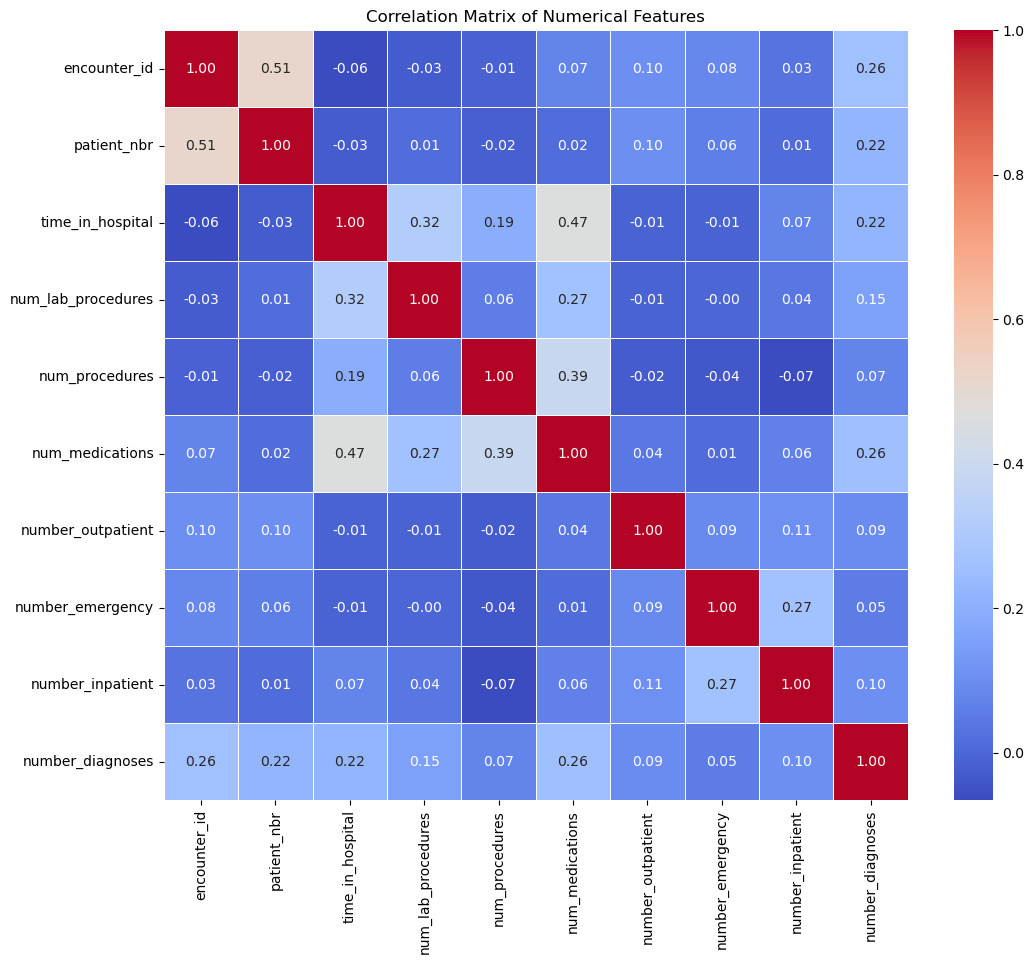

In [82]:
# Multicollinearity
# Separate numerical and categorical columns
numerical_columns = df_categorical.select_dtypes(include=[np.number]).columns
categorical_columns = df_categorical.select_dtypes(exclude=[np.number]).columns

# Encode categorical columns (using Label Encoding for simplicity)
label_encoder = LabelEncoder()

for col in categorical_columns:
    df_categorical[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string before encoding

# Now, calculate the correlation matrix for numerical features
correlation_matrix = df_categorical[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

High multicollinearity results from a linear relationship between independent variables with a high degree of correlation. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. Our Dataset has no features that are highly correlated.

## Reflection
- What is the hardest part of the project that you’ve encountered so far?- 	What are your initial insights
- Going forward, what are the current biggest problems you’re facing?- 	Do you think you are on track with your project? If not, what parts do you need to dedicate more time t?
?


## Roles & Coordination
- Cleaning, preprocessing, feature engineering - Jaimin Babaria, Rujuta Tambewagh 
- Visualization, exploratory Data Analysis - Vishak Baddur, Sudha Sree Yerramsetty
- Model training and  evaluation- Varsha Balaji, Simran Mishra

## Next Steps